# Limitações e os Modelos de Classificação.

Nosso case a ser analisado na aula de hoje é um dataset que contém algumas características sobre informações de voos.

Nosso foco basicamente consiste em prever se um determinado voo sofrerá atrasos, a partir da informação da partida programada.



*   Flight: Número do voo.
*   Time: Horário de partida do voo.
*   Length: Duração do voo.
*   Airline: Nome do avião.
*   AirportFrom: Partida.
*   AirportTo: Destino.
*   DayOfWeek: Dia da semana

*  Class: Classe de atraso.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'data/airlines.csv'

df_voos = pd.read_csv(url, sep=',')

df_voos

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [4]:
df_voos.shape

(539382, 8)

In [5]:
df_voos.describe().round(2)

,Flight,Time,Length,DayOfWeek,Class
count,539382.00,539382.00,539382.00,539382.00,539382.00
mean,2427.93,802.73,132.20,3.93,0.45
std,2067.43,278.05,70.12,1.91,0.50
min,1.00,10.00,0.00,1.00,0.00
25%,712.00,565.00,81.00,2.00,0.00
50%,1809.00,795.00,115.00,4.00,0.00
75%,3745.00,1035.00,162.00,5.00,1.00
max,7814.00,1439.00,655.00,7.00,1.00


## Analisando a consistência dos dados

In [7]:
df_voos.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [8]:
df_voos.duplicated().sum()

216618

In [9]:
df_voos[df_voos.duplicated()]

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
373,4532.0,660.0,95.0,MQ,BNA,DCA,3,0
472,3304.0,1175.0,50.0,MQ,GRK,DFW,1,0
486,31.0,1410.0,344.0,US,OGG,PHX,7,0
940,4653.0,1053.0,145.0,OO,FAR,SLC,4,0
969,3784.0,1185.0,78.0,9E,MEM,COU,3,0
...,...,...,...,...,...,...,...,...
539374,1460.0,933.0,158.0,FL,MCO,MDW,3,1
539376,1740.0,652.0,83.0,DL,LAS,SLC,4,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


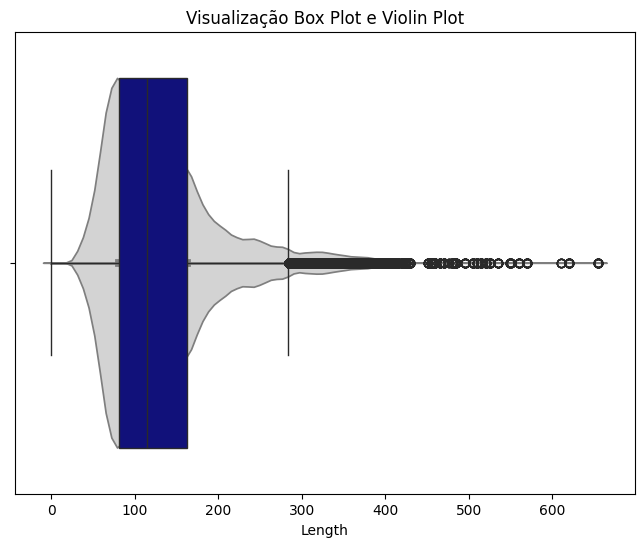

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x='Length', data=df_voos, ax=ax, color='lightgray')
sns.boxplot(x='Length', data=df_voos, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Box Plot e Violin Plot')
plt.show()

In [15]:
atraso_voo = df_voos.groupby('Class')
atraso_voo.describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

<Axes: xlabel='Airline', ylabel='count'>

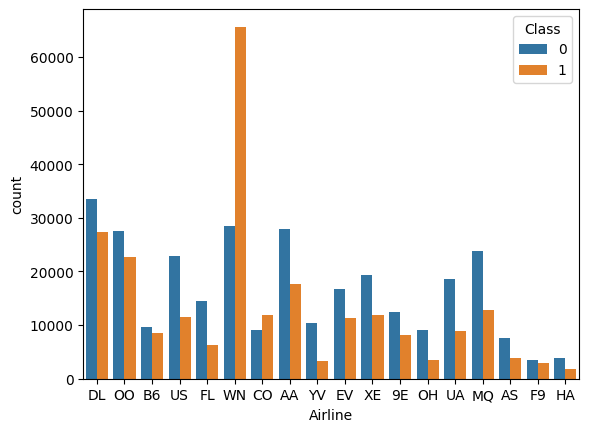

In [17]:
sns.countplot(x='Airline', hue='Class', data=df_voos)

<Axes: xlabel='DayOfWeek', ylabel='count'>

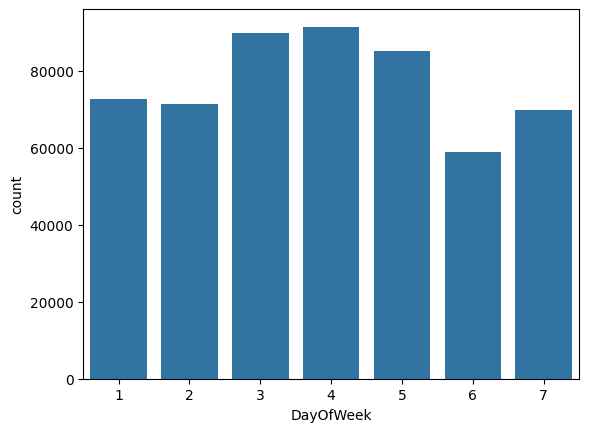

In [19]:
diasSemana = list(range(1,8))
sns.countplot(x='DayOfWeek', data=df_voos, order=diasSemana)

<Axes: xlabel='Class', ylabel='count'>

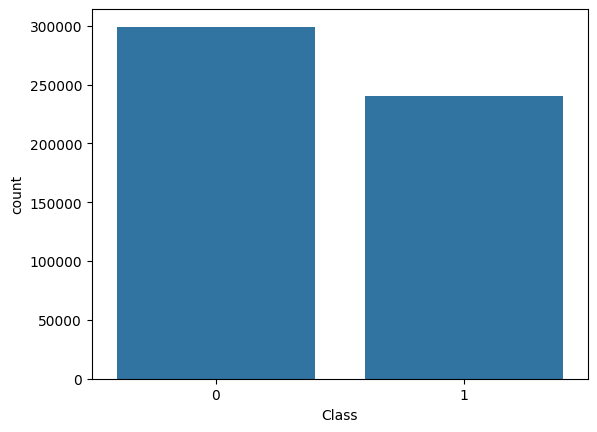

In [20]:
sns.countplot(x='Class', data=df_voos)

A base de dados não está equilibrada e a falta de equilíbrio na base de dados pode deixar o algoritmo enviesado.

Esse tipo de problema é chamado de **"desbalanceamento de classes"**.

Quando uma classe é muito mais frequente que as outras no conjunto de dados, o modelo tende a dar mais importância a essa classe, o que pode levar a uma classificação incorreta das classes minoritárias. 

## Pré-processamento da base

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
df_voos.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [24]:
df_voos['AirportFrom'] = LabelEncoder().fit_transform(df_voos['AirportFrom'])
df_voos['AirportTo'] = LabelEncoder().fit_transform(df_voos['AirportTo'])
df_voos['Airline'] = LabelEncoder().fit_transform(df_voos['Airline'])

In [25]:
df_voos.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0
3,31.0,1410.0,344.0,14,203,217,6,0
4,563.0,692.0,98.0,8,32,16,4,0


## Separando a base de dados

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = df_voos[['Flight', 'Time',  'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
y = df_voos['Class']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

## Utilizando o modelo de naive bayes

É um algortimo  baseado no teorema de Bayes e na suposição de independência condicional entre atributos. 

O modelo Naive Bayes calcula a probabilidade condicional de uma determinada classe, dada uma entrada de dados ou conjunto de atributos, utilizando a regra de Bayes. 

Ele assume que os atributos de entrada são independentes entre si, ou seja, a presença ou ausência de um atributo não é afetada pela presença ou ausência de outro atributo

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb = GaussianNB()

In [31]:
gnb.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred = gnb.predict(x_test)

## Validando o modelo

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", round(accuracy,2))

Accuracy:  0.59


## Equilibrando a base de dados


O oversampling é o processo de duplicar ou criar novas amostras da classe minoritária, enquanto o undersampling é o processo de remover algumas amostras da classe majoritária.

In [35]:
from sklearn.utils import resample

In [37]:
df_majority = df_voos[df_voos.Class == 0]
df_minority = df_voos[df_voos.Class == 1]

In [38]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority),  random_state=7)

In [39]:
df_equilibrado = pd.concat([df_majority, df_minority_upsampled])

<Axes: xlabel='Class', ylabel='count'>

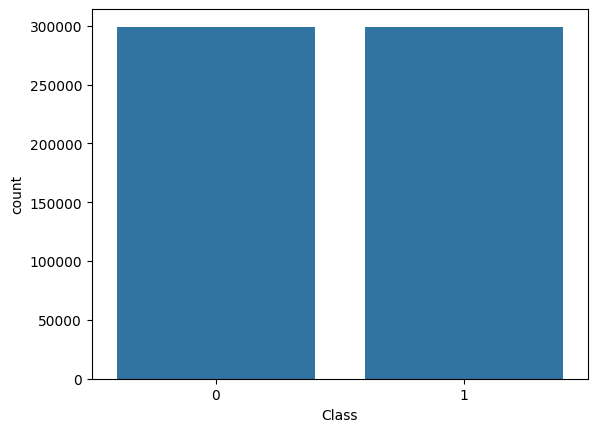

In [40]:
sns.countplot(x='Class',data=df_equilibrado)

## Teste com a base equilibrada

In [41]:
x_equilibrado = df_equilibrado[['Flight', 'Time', 'Length',  'DayOfWeek']]
y_equilibrado = df_equilibrado['Class']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, stratify=y_equilibrado , random_state=7)

In [43]:
gnb_equilibrado = GaussianNB()
gnb_equilibrado.fit(x_train, y_train)

GaussianNB()

In [44]:
y_pred_gnb_equilibrado = gnb_equilibrado.predict(x_test)

In [45]:
accuracy_equilibrado = accuracy_score(y_test, y_pred_gnb_equilibrado)
print("Accuracy:", round(accuracy_equilibrado,2))

Accuracy: 0.57


## Utilizando o modelo Random Forest

O modelo de Random Forest cria de forma aleatória várias Árvores de Decisão (Decision Trees) e combina o resultado de todas elas para chegar no resultado final.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, random_state=7)

In [48]:
rf = RandomForestClassifier( random_state=7)

In [49]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=7)

In [50]:
y_pred_rf = rf.predict(x_test)

In [51]:
accuracy_equilibrado_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", round(accuracy_equilibrado_rf,2))

Accuracy: 0.69
